In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [3]:
linear = LinearRegression()
linear.fit(x.reshape(-1,1), y)

LinearRegression()

In [4]:
test_x = np.array([6, 7, 8, 9, 10])
predict = linear.predict(test_x.reshape(-1,1))
predict

array([12., 14., 16., 18., 20.])

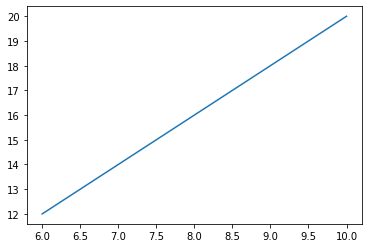

In [5]:
plt.plot(test_x, predict)

In [23]:
import pandas as pd

# 1. 데이터 준비

names = ['순번', '일자', '가슴둘레', '소매길이', '신장', '샅높이','허리둘레', '머리둘레', '발길이', '몸무게']
df = pd.read_csv('./data/army_data.csv', encoding='cp949', names=names, header=0, low_memory=False)
df = df[['일자', '신장', '몸무게']]
df

,일자,신장,몸무게
0,20140106,185.500,73.200
1,2013,167.200,65.100
2,20140106,179.900,93.200
3,2013,171.400,71.600
4,20140106,176.900,67.100
...,...,...,...
167978,20170131,173.2 cm,73.7 kg
167979,20170131,166.3 cm,70.7 kg
167980,20170131,175.2 cm,78.7 kg
167981,20170131,173.6 cm,57.4 kg


In [25]:
# 결측치 제거
df.dropna(inplace=True)
df

,일자,신장,몸무게
0,20140106,185.500,73.200
1,2013,167.200,65.100
2,20140106,179.900,93.200
3,2013,171.400,71.600
4,20140106,176.900,67.100
...,...,...,...
167978,20170131,173.2 cm,73.7 kg
167979,20170131,166.3 cm,70.7 kg
167980,20170131,175.2 cm,78.7 kg
167981,20170131,173.6 cm,57.4 kg


In [35]:
# 일자 뒤에 4자리 자르기
df['일자'] = list(map(lambda x: int(str(x)[:4]) if len(str(x)) > 4 else x, df['일자']))

In [33]:
# 신장을 float으로 바꾸기 (cm도 바꾸기)
df['신장'] = list(map(lambda x: float(str(x).split(' ')[0]), df['신장']))

In [45]:
# 몸무게를 float으로 바꾸기 (kg 제거)
df['몸무게'] = list(map(lambda x: str(x).split(' ')[0], df['몸무게']))
# 빈값 존재
df['몸무게'] = list(map(lambda x: float(x) if x else None, df['몸무게']))
df.dropna(inplace = True)

In [77]:
X = df['몸무게']
y = df['신장']

In [78]:
from sklearn.model_selection import train_test_split

# 2. 데이터 분할 (train_X, test_X)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [79]:
from sklearn.linear_model import LinearRegression

# 3. 준비 (모델)

linear = LinearRegression()

In [80]:
# 4. 학습
linear.fit(train_X.values.reshape(-1, 1), train_y)

LinearRegression()

In [81]:
# 5. 예측

predict = linear.predict(test_X.values.reshape(-1,1))

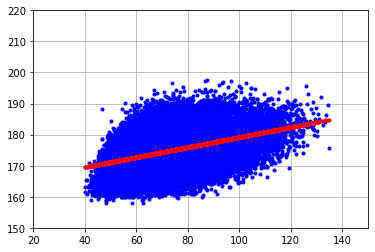

In [87]:
import matplotlib.pyplot as plt

plt.plot(test_X, test_y, 'b.')
plt.plot(test_X, predict, 'r.')
plt.xlim(20, 150)
plt.ylim(150, 220)
plt.grid()

In [88]:
linear.predict([[70]])

array([174.33858459])

In [93]:
# 연도별로 나눠서 해보기
df['date_new'] = df['일자'].map({2013 : 0, 2014 : 1, 2015 : 2, 2016 : 3, 2017: 4})
# df['date_new'] = list(map(lambda x: 0 if x == 2013 else 1 if x == 2014 else 2 if x == 2015 else 3 if x == 2016 else 4, df['date']))

In [90]:
X = df[['몸무게', 'date_new']]  # reshape 할 필요 x
y = df['신장']

In [91]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
linear = LinearRegression()
linear.fit(train_X, train_y)
predict = linear.predict(test_X)
linear.predict([[70, 4]])

/home/jngmk/anaconda3/envs/ai/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.98796811])